In [247]:
import pandas as pd
import numpy as np
from astropy.io import fits
from astropy.table import Table
from glob import glob
import matplotlib.pyplot as plt
import scipy
from math import lgamma
import seaborn as sns
%matplotlib inline

path = '/Users/chris/Desktop/mastrangelo/'

In [34]:
import matplotlib.pylab as pylab
pylab_params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(pylab_params)

total_stars = 67380

In [23]:
from ast import literal_eval

#https://stackoverflow.com/questions/52232742/how-to-use-ast-literal-eval-in-a-pandas-dataframe-and-handle-exceptions
def literal_eval_w_exceptions(x):
    try:
        return literal_eval(str(x))   
    except Exception as e:
        #print(e)
        pass

Read in files. For each recovery DataFrame per model, calculate the geometric and detected transit multiplicity. For each model, plot the 30 recovery multiplicities over the single ground truth one. There should be one plus (three times two times three) models, or 19 different models. Which models have greater spread? Let's find out!

In [181]:
truth = pd.read_csv(path+'collect_ground_truth.csv', converters=dict(transit_multiplicities=literal_eval))
truth

,ms,bs,cs,fs,transit_multiplicities,geom_transit_multiplicities,logLs,intact_fracs,disrupted_fracs
0,-2.0,0.0,1.000000e+08,0.1,"[206.20000000000002, 10.100000000000001]","[425.8, 39.1]",-766.404652,0.0,0.1
1,-2.0,0.0,1.000000e+08,0.2,"[412.40000000000003, 20.200000000000003]","[851.6, 78.2]",-312.431328,0.0,0.2
2,-2.0,0.0,1.000000e+08,0.3,"[618.6000000000001, 30.300000000000004]","[1277.4, 117.30000000000001]",-136.646569,0.0,0.3
3,-2.0,0.0,1.000000e+08,0.4,"[824.8000000000001, 40.400000000000006]","[1703.2, 156.4]",-74.758005,0.0,0.4
4,-2.0,0.0,1.000000e+08,0.5,"[1031.0, 50.5]","[2129.0, 195.5]",-75.278191,0.0,0.5
...,...,...,...,...,...,...,...,...,...
185,0.0,1.0,1.000000e+10,0.6,"[1479.0, 700.8, 346.2, 152.4, 36.0, 2.4]","[1598.3999999999999, 1084.2, 788.4, 544.199999...",-877.700699,0.6,0.0
186,0.0,1.0,1.000000e+10,0.7,"[1725.5000000000002, 817.6, 403.90000000000003...","[1864.8000000000002, 1264.9, 919.8000000000001...",-1172.496252,0.7,0.0
187,0.0,1.0,1.000000e+10,0.8,"[1972.0, 934.4000000000001, 461.6, 203.2000000...","[2131.2000000000003, 1445.6000000000001, 1051....",-1488.426575,0.8,0.0
188,0.0,1.0,1.000000e+10,0.9,"[2218.5, 1051.2, 519.3000000000001, 228.6, 54....","[2397.6, 1626.3, 1182.6000000000001, 816.30000...",-1820.498963,0.9,0.0


In [182]:
recovery = pd.read_csv(path+'collect_recovery.csv', converters=dict(transit_multiplicities=literal_eval))
recovery

,ms,bs,cs,fs,transit_multiplicities,geom_transit_multiplicities,logLs,intact_fracs,disrupted_fracs
0,-2.0,0.0,1.000000e+08,0.1,"[205.0, 12.100000000000001]","[425.6, 39.300000000000004]",-747.856750,0.0,0.1
1,-2.0,0.0,1.000000e+08,0.2,"[410.0, 24.200000000000003]","[851.2, 78.60000000000001]",-294.683426,0.0,0.2
2,-2.0,0.0,1.000000e+08,0.3,"[615.0000000000001, 36.300000000000004]","[1276.8000000000002, 117.90000000000002]",-119.698666,0.0,0.3
3,-2.0,0.0,1.000000e+08,0.4,"[820.0, 48.400000000000006]","[1702.4, 157.20000000000002]",-58.610102,0.0,0.4
4,-2.0,0.0,1.000000e+08,0.5,"[1025.0, 60.5]","[2128.0, 196.5]",-59.930288,0.0,0.5
...,...,...,...,...,...,...,...,...,...
5405,0.0,1.0,1.000000e+10,1.0,"[2456.0, 1158.0, 554.0, 241.0, 67.0, 8.0]","[2683.0, 1766.0, 1274.0, 945.0, 434.0, 92.0]",-2127.285647,1.0,0.0
5406,0.0,1.0,1.000000e+10,1.0,"[2338.0, 1197.0, 578.0, 261.0, 53.0, 10.0]","[2648.0, 1785.0, 1361.0, 909.0, 458.0, 94.0]",-2115.227004,1.0,0.0
5407,0.0,1.0,1.000000e+10,1.0,"[2367.0, 1172.0, 590.0, 229.0, 68.0, 10.0]","[2598.0, 1798.0, 1336.0, 908.0, 419.0, 109.0]",-2106.721574,1.0,0.0
5408,0.0,1.0,1.000000e+10,1.0,"[2373.0, 1197.0, 601.0, 220.0, 57.0, 13.0]","[2707.0, 1739.0, 1307.0, 947.0, 435.0, 114.0]",-2127.566157,1.0,0.0


Build zero bins for both DataFrames

In [183]:
zero_bins = []
transit_multiplicity_zero_bin = []
for j, i in enumerate(truth.transit_multiplicities[:]):
    zero_bins.append(total_stars-np.sum(i))
    temp = truth.reset_index().transit_multiplicities[:][j]
    temp.insert(0,total_stars - np.sum(i))
    transit_multiplicity_zero_bin.append(temp)
truth['transit_multiplicity_zero_bin'] = transit_multiplicity_zero_bin

zero_bins = []
transit_multiplicity_zero_bin = []
for j, i in enumerate(recovery.transit_multiplicities[:]):
    zero_bins.append(total_stars-np.sum(i))
    temp = recovery.reset_index().transit_multiplicities[:][j]
    temp.insert(0,total_stars - np.sum(i))
    transit_multiplicity_zero_bin.append(temp)
recovery['transit_multiplicity_zero_bin'] = transit_multiplicity_zero_bin

Pad transit multiplicities with zeros so they're all the same length.

In [184]:
def pad(lam):
    lam += [0.] * (7 - len(lam)) # pad with zeros to match length of k
    return lam

truth['transit_multiplicities'] = truth.transit_multiplicities.apply(pad)
recovery['transit_multiplicities'] = recovery.transit_multiplicities.apply(pad)


#### See if injection-recovery works for a single model

m = -1, b = 0.5, c = 1e9, f = 0.3

In [113]:
tm = truth.loc[(truth.ms == -1) & (truth.bs == 0.5) & (truth.cs == 1e9) & (np.round(truth.fs,1) == 0.3)].transit_multiplicities

tm_recovery = recovery.loc[(recovery.ms == -1) & (recovery.bs == 0.5) & (recovery.cs == 1e9) & (np.round(recovery.fs,1) == 0.3)].transit_multiplicities.to_list()

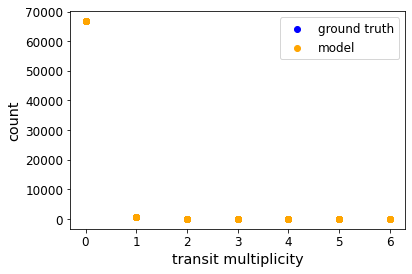

In [145]:
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.scatter(np.arange(len(np.sum(tm))), np.sum(tm), label='ground truth', color='blue')
plt.scatter(np.arange(len(tm_recovery[0])), tm_recovery[0], label='model', color='orange')

for i in tm_recovery[1:]:
    plt.scatter(np.arange(len(i)), i, color='orange')

plt.ylabel('count')
plt.xlabel('transit multiplicity')
#plt.xlim([-0.5,6])
plt.legend()
plt.show()

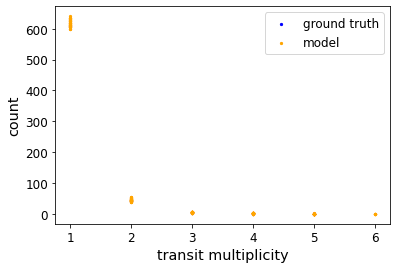

In [147]:
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.scatter(np.arange(len(np.sum(tm)))[1:], np.sum(tm)[1:], label='ground truth', color='blue', s=5)
plt.scatter(np.arange(len(tm_recovery[0]))[1:], tm_recovery[0][1:], label='model', color='orange', s=5)

for i in tm_recovery[1:]:
    plt.scatter(np.arange(len(i))[1:], i[1:], color='orange', s=5)

plt.ylabel('count')
plt.xlabel('transit multiplicity')
#plt.xlim([-0.5,6])
plt.legend()
plt.show()

Ok, so whether or not I include the zero-bin, our injection-recovery envelopes the ground truth, at least for the middling fiducial model I chose. Now how about for all of them?

In [149]:
def prior_grid_logslope(cube, ndim, nparams, gi_m, gi_b, gi_c):
    """
    Each model run will use an evenly spaced (m,b, cutoff) tuple on a discrete 11x11x11 3D grid
    We're doing log(time), so slope is sampled linearly (everything gets logged together later)
    If a cutoff results in a zero probability, don't bother 

    gi_m: grid index on m axis
    gi_b: grid index on b axis
    gi_c: grid index for cutoff time axis
    """
    #cube[0] = -1e-9*np.logspace(8,10,11)[gi_m] # convert from year to Gyr
    cube[0] = np.linspace(-2,0,3)[gi_m] 
    cube[1] = np.linspace(0,1,3)[gi_b]
    #cube[2] = np.logspace(1e8,1e10,11)
    cube[2] = np.logspace(8,10,3)[gi_c] # in Ballard et al in prep, they use log(yrs) instead of drawing yrs from logspace
    return cube

In [212]:
cube = [0,0,0]
fs = np.round(np.linspace(0.1, 1.), 1)
ndim = 3
nparams = 3
for gi_m in range(3):

    for gi_b in range(2):
        gi_b = gi_b + 1

        for gi_c in range(3):
            #print(gi_m, gi_b, gi_c) # so I know where I am
            cube = prior_grid_logslope(cube, ndim, nparams, gi_m, gi_b, gi_c)

            for f in fs:
                #recovery_min = []
                #recovery_max = []
                #recovery_avg = []
                #print(cube)
                tm = truth.loc[(truth.ms == cube[0]) & (truth.bs == cube[1]) & (truth.cs == cube[2]) & (np.round(truth.fs,1) == f)].transit_multiplicities
                tm_recovery = recovery.loc[(recovery.ms == cube[0]) & (recovery.bs == cube[1]) & (recovery.cs == cube[2]) & (np.round(recovery.fs,1) == f)].transit_multiplicities.to_list()
                
                # take min/max envelopes and avg for tm_recovery
                for i in range(len(np.sum(tm))):
                    fail = False
                    #recovery_min.append(np.amin(np.take(tm_recovery, indices=i, axis=1)))
                    #recovery_max.append(np.amax(np.take(tm_recovery, indices=i, axis=1)))
                    #recovery_avg.append(np.mean(np.take(tm_recovery, indices=i, axis=1)))

                    # flag whenever a model's ground truth is not successfully recovered
                    min_elt = np.amin(np.take(tm_recovery, indices=i, axis=1))
                    max_elt = np.amax(np.take(tm_recovery, indices=i, axis=1))
                    avg_elt = np.mean(np.take(tm_recovery, indices=i, axis=1))
                    
                    if (np.sum(tm)[i] <= max_elt) and (np.sum(tm)[i] >= min_elt):
                        continue
                    else:
                        fail = True
                        #print(cube, f)
                        #print(min_elt, np.sum(tm)[i], max_elt)
                        
                if fail == True:
                    print(cube, f, min_elt, np.sum(tm)[i], max_elt, tm_recovery, i,
                         np.amin(np.take(tm_recovery, indices=i, axis=1)),
                         np.amax(np.take(tm_recovery, indices=i, axis=1)),
                         np.mean(np.take(tm_recovery, indices=i, axis=1)))
                    asdfa
                    
                #print(recovery_min)
                #print(np.sum(tm))
                #afdf

Seems like all models match. But to pass the injection-recovery test, the marginalized posterior must show that the favored model is the original ground truth model.

### Posteriors

#### Fiducial model

In [235]:
tm_fiducial = truth.loc[(truth.ms == -1) & (truth.bs == 0.5) & (truth.cs == 1e9) & (np.round(truth.fs,1) == 0.3)].transit_multiplicities

tm_recovery = recovery.loc[(recovery.ms == -1) & (recovery.bs == 0.5) & (recovery.cs == 1e9) & (np.round(recovery.fs,1) == 0.3)].transit_multiplicities.to_list()

In [231]:
def better_loglike(lam, k):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of ints)
    - k: Kepler transit multiplicity (list of ints); can accept alternate ground truths as well

    Returns: Poisson log likelihood (float)
    """

    logL = []
    for i in range(len(lam)):
        if lam[i]==0:
            term3 = -lgamma(k[i]+1)
            term2 = -lam[i]
            term1 = 0
            logL.append(term1+term2+term3)

        else:
            term3 = -lgamma(k[i]+1)
            term2 = -lam[i]
            term1 = k[i]*np.log(lam[i])
            logL.append(term1+term2+term3)

    return np.sum(logL)

better_loglike(tm_recovery[0], np.sum(tm))

-18.74793912319464

In [ ]:
cube = [0,0,0]
fs = np.round(np.linspace(0.1, 1.), 1)
ndim = 3
nparams = 3

ms = []
bs = []
cs = []
fs_for_df = []
all_logLs = []

for gi_m in range(3):
    
    for gi_b in range(2):
        gi_b = gi_b + 1

        for gi_c in range(3):
            cube = prior_grid_logslope(cube, ndim, nparams, gi_m, gi_b, gi_c)
            
            for f in fs:
                
                ms.append(cube[0])
                bs.append(cube[1])
                cs.append(cube[2])
                fs_for_df.append(f)
                
                tm = truth.loc[(truth.ms == cube[0]) & (truth.bs == cube[1]) & (truth.cs == cube[2]) & (np.round(truth.fs,1) == f)].transit_multiplicities
                tm_recovery = recovery.loc[(recovery.ms == cube[0]) & (recovery.bs == cube[1]) & (recovery.cs == cube[2]) & (np.round(recovery.fs,1) == f)].transit_multiplicities.to_list()
                
                # calculate logL for each realization of each model, using tm as the ground truth
                logLs = []
                for i in range(len(tm_recovery)):
                    logL = better_loglike(tm_recovery[i], np.sum(tm_fiducial))
                    logLs.append(logL)
                
                # get best logL for each model
                best_logL = np.amax(logLs)
                all_logLs.append(best_logL)
                

In [240]:
model_logLs = pd.DataFrame({'m': ms, 'b': bs, 'c': cs, 'f': fs_for_df, 'logL': all_logLs})
model_logLs

,m,b,c,f,logL
0,-2.0,0.5,1.000000e+08,0.1,-257.249357
1,-2.0,0.5,1.000000e+08,0.1,-257.249357
2,-2.0,0.5,1.000000e+08,0.1,-257.249357
3,-2.0,0.5,1.000000e+08,0.2,-143.260785
4,-2.0,0.5,1.000000e+08,0.2,-143.260785
...,...,...,...,...,...
895,0.0,1.0,1.000000e+10,0.9,-2452.943240
896,0.0,1.0,1.000000e+10,0.9,-2452.943240
897,0.0,1.0,1.000000e+10,1.0,-2844.481398
898,0.0,1.0,1.000000e+10,1.0,-2844.481398


In [245]:
# marginalize in 1D
marginalized_logLs = []
for gi_m in range(3):

    cube = prior_grid_logslope(cube, ndim, nparams, gi_m, gi_b, gi_c)
    
    # subset
    only = model_logLs.loc[(model_logLs.m == cube[0]) & (model_logLs.f == 0.3)]
    
    # marginalize logL
    marginalized_logLs.append(np.sum(only.logL))
print(marginalized_logLs)

[-7477.736181913809, -7414.1332899553445, -10333.122242547961]


In [268]:
model_logLs.loc[model_logLs.f == 0.3].groupby(['m','b']).mean('logL').reset_index()

,m,b,c,f,logL
0,-2.0,0.5,3.700000e+09,0.3,-203.465507
1,-2.0,1.0,3.700000e+09,0.3,-295.050239
2,-1.0,0.5,3.700000e+09,0.3,-204.726314
3,-1.0,1.0,3.700000e+09,0.3,-289.549238
4,0.0,0.5,3.700000e+09,0.3,-210.400722
5,0.0,1.0,3.700000e+09,0.3,-478.474094


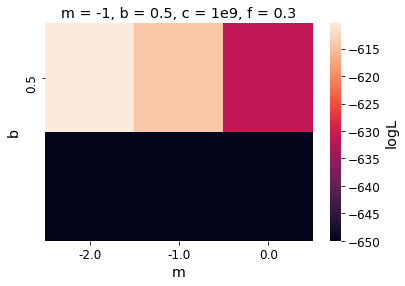

In [266]:
piv = model_logLs.loc[model_logLs.f == 0.3].groupby(['m','b','c']).mean('logL').reset_index().groupby(['m','b']).sum('logL').reset_index()

piv = piv.pivot("b","m","logL") # vs logged_normalized_likelihood
#print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values), np.nansum(np.log(piv.values)), np.log(np.nansum(piv.values)))
#print(np.log(np.nanmin(piv.values)), np.log(np.nanmax(piv.values)))

fig, ax = plt.subplots()
sns.heatmap(piv, yticklabels=model_logLs.b.unique().round(1), cbar_kws={'label': 'logL'}, vmin=-650)
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
plt.title('m = -1, b = 0.5, c = 1e9, f = 0.3')
plt.show()

There are the following degeneracies: when the ground truth is moderate sculpting, we favor moderate sculpting, as well as 1) moderate longevity and initial intact fraction but fast sculpting; and, to a lesser extent, 2) no sculpting and moderate initial intact fraction. How can that be? I guess there are so few stars younger than 1 Gyr that calling it moderate is a bit disingenous. Perhaps I should try another slice of model space, close to 4 or 5 Gyrs. 

In [276]:
np.logspace(8,10,11)[8]

3981071705.5349693

#### Now, for all models

In [ ]:
cube = [0,0,0]
fs = np.round(np.linspace(0.1, 1.), 1)
ndim = 3
nparams = 3

ms = []
bs = []
cs = []
fs_for_df = []
all_logLs = []

for gi_m in range(3):
    
    for gi_b in range(2):
        gi_b = gi_b + 1

        for gi_c in range(3):
            cube = prior_grid_logslope(cube, ndim, nparams, gi_m, gi_b, gi_c)
            
            for f in fs:
                
                ms.append(cube[0])
                bs.append(cube[1])
                cs.append(cube[2])
                fs_for_df.append(f)
                
                tm = truth.loc[(truth.ms == cube[0]) & (truth.bs == cube[1]) & (truth.cs == cube[2]) & (np.round(truth.fs,1) == f)].transit_multiplicities
                tm_recovery = recovery.loc[(recovery.ms == cube[0]) & (recovery.bs == cube[1]) & (recovery.cs == cube[2]) & (np.round(recovery.fs,1) == f)].transit_multiplicities.to_list()
                
                # calculate logL for each realization of each model, using tm as the ground truth
                logLs = []
                for i in range(len(tm_recovery)):
                    logL = better_loglike(tm_recovery[i], np.sum(tm_fiducial))
                    logLs.append(logL)
                
                # get best logL for each model
                best_logL = np.amax(logLs)
                all_logLs.append(best_logL)
                

### Quick, fiducial plots for ERES slides

Show example difference in observed transit multiplicity yields for intact vs disrupted systems

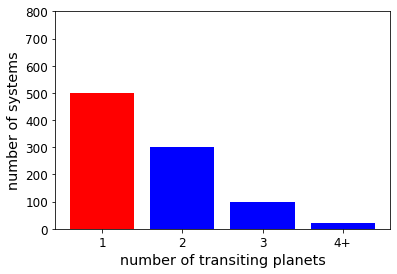

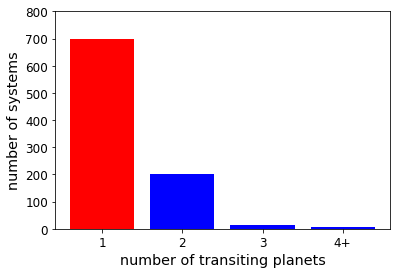

In [90]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#bar_eres = pd.DataFrame({'transits': ['0', '1', '2', '3+']}) # for the x axis label
bar_eres = pd.DataFrame({'transits': ['1', '2', '3', '4+']}) # for the x axis label
c = ['red', 'blue', 'blue', 'blue'] # bar colors

plt.bar(bar_eres.transits, [500, 300, 100, 20], color=c)
plt.xlabel('number of transiting planets')
plt.ylabel('number of systems')
plt.ylim([0, 800])
#plt.savefig(path+'figures/intact.png', facecolor='white', edgecolor='white', bbox_inches='tight')
plt.show()

c = ['red', 'blue', 'blue', 'blue'] # bar colors
plt.bar(bar_eres.transits, [700, 200, 15, 5], color=c)
plt.xlabel('number of transiting planets')
plt.ylabel('number of systems')
plt.ylim([0, 800])
#plt.savefig(path+'figures/disrupted.png', facecolor='white', edgecolor='white', bbox_inches='tight')
plt.show()

Plot Figure 4, Yang+ 2022 from http://www.lamost.org/publications/upload/2022/Yang%20Jiayi-AJ(2022).pdf

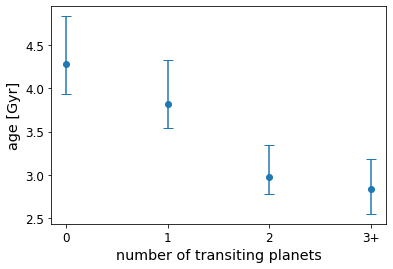

In [84]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

chen_comparison = pd.DataFrame({'multi': ['0', '1', '2', '3+'], 
                               'age': [4.28, 3.82, 2.98, 2.84],
                               'err1': [0.55, 0.5, 0.36, 0.34],
                               'err2': [0.35, 0.28, 0.2, 0.29]})

#plt.errorbar([1], [np.median(ones.iso_age)], yerr=[[-np.median(ones.iso_age_err2)], [np.median(ones.iso_age_err1)]], fmt='o')
plt.errorbar(chen_comparison.multi, chen_comparison.age, yerr=[chen_comparison.err2, chen_comparison.err1],
            fmt='o', capsize=5)

plt.ylabel('age [Gyr]')
plt.xlabel('number of transiting planets')
plt.savefig(path+'figures/past-ii.png', facecolor='white', edgecolor='white', bbox_inches='tight')
plt.show()

In [213]:
chen_comparison

,multi,age,err1,err2
0,0,4.28,0.55,0.35
1,1,3.82,0.50,0.28
2,2,2.98,0.36,0.20
3,3+,2.84,0.34,0.29


In [216]:
tm = truth.loc[(truth.ms == -1) & (truth.bs == 0.5) & (truth.cs == 1e9) & (np.round(truth.fs,1) == 0.3)].transit_multiplicities
tm

82    [66724.5, 609.6000000000001, 42.30000000000000...
Name: transit_multiplicities, dtype: object

In [217]:
truth.loc[(truth.ms == -1) & (truth.bs == 0.5) & (truth.cs == 1e9) & (np.round(truth.fs,1) == 0.3)]

,ms,bs,cs,fs,transit_multiplicities,geom_transit_multiplicities,logLs,intact_fracs,disrupted_fracs,transit_multiplicity_zero_bin
82,-1.0,0.5,1.000000e+09,0.3,"[66724.5, 609.6000000000001, 42.30000000000000...","[1263.6000000000001, 129.00000000000003, 8.400...",-224.004177,0.01881,0.28119,"[66724.5, 609.6000000000001, 42.30000000000000..."


In [222]:
df = pd.read_csv(path+'systems/transits0_1_0.csv', sep=',')
df

/Users/chris/anaconda2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,4,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,kepid,iso_teff,iso_teff_err1,iso_teff_err2,feh_x,feh_err1,feh_err2,iso_age,iso_age_err1,...,incl,mutual_incl,ecc,omega,lambda_ks,second_terms,geom_transit_status,transit_status,prob_detections,sn
0,0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,-0.205712,0.003269,0.079433,5.328677,8.484696e+47,0.003165,0.0,0.0,0.0,0.0
1,0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,-0.236934,0.034490,0.109648,1.111269,6.127440e+47,0.006621,0.0,0.0,0.0,0.0
2,0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,-0.324149,0.121706,0.173780,5.676972,1.122792e+48,0.022500,0.0,0.0,0.0,0.0
3,0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,-0.190797,-0.011646,0.144544,3.499886,4.680497e+47,0.010569,0.0,0.0,0.0,0.0
4,0,757280.0,6856.8,144.4,-139.9,-0.24,0.25,-0.3,1.24,0.20,...,-0.206182,0.003739,0.114815,1.152918,1.010308e+48,0.006620,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243268,69294,12984200.0,5843.1,122.8,-117.6,-0.28,0.30,-0.3,5.81,1.07,...,-1.190046,0.050542,0.012023,4.015136,9.518226e+47,0.001349,0.0,0.0,0.0,0.0
243269,69294,12984200.0,5843.1,122.8,-117.6,-0.28,0.30,-0.3,5.81,1.07,...,-1.177185,0.037681,0.054954,1.144401,1.306789e+48,0.002220,0.0,0.0,0.0,0.0
243270,69294,12984200.0,5843.1,122.8,-117.6,-0.28,0.30,-0.3,5.81,1.07,...,-1.129590,-0.009914,0.173780,4.143923,8.797263e+47,0.015264,0.0,0.0,0.0,0.0
243271,69295,12984307.0,5892.6,105.7,-107.3,-0.16,0.35,-0.3,5.33,2.03,...,-0.213230,-0.184346,0.301995,5.843744,1.108083e+48,0.062843,0.0,0.0,0.0,0.0


In [220]:
df.groupby('kepid').count()['transit_status'].reset_index().groupby('transit_status').count().reset_index().kepid

0         2
1     17552
2     17229
3        42
4        23
5     16930
6     17236
7        86
8        38
9        11
10       27
11       39
12       22
13       10
14        9
15        3
16        6
17       11
18        8
19        8
20        2
21        2
22        2
Name: kepid, dtype: int64